In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#importing the datasets 
df= pd.read_csv("C:\\Users\\hp\\Downloads\\Copy of house_price.csv")

In [3]:
df.shape

(1000, 7)

In [4]:
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [5]:
df.tail()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
995,Bommanahalli,3,1,1460,1,2,25000
996,Whitefield,3,0,2100,1,7,28000
997,Bommanahalli,2,0,1033,5,0,16500
998,Bommanahalli,3,0,1500,10,1,22000
999,Whitefield,3,1,1768,5,11,30000


In [6]:
#removing the location column
df=df.drop(columns=['Location'])
print(df)

     BHK  Furnishing  Sq.ft  Old(years)  Floor  Price
0      3           1   3000           1      3  28000
1      3           1   1650          10      0  18000
2      2           0   1000           5      3  16400
3      3           0   1600           1      9  27000
4      2           1   1200           5      1  20000
..   ...         ...    ...         ...    ...    ...
995    3           1   1460           1      2  25000
996    3           0   2100           1      7  28000
997    2           0   1033           5      0  16500
998    3           0   1500          10      1  22000
999    3           1   1768           5     11  30000

[1000 rows x 6 columns]


In [7]:
#EDA:- explorating data analysis
df.dtypes

BHK           int64
Furnishing    int64
Sq.ft         int64
Old(years)    int64
Floor         int64
Price         int64
dtype: object

In [8]:
df['BHK'].value_counts()

2    564
3    436
Name: BHK, dtype: int64

In [9]:
#to check missing outlier value
df.isna().sum()

BHK           0
Furnishing    0
Sq.ft         0
Old(years)    0
Floor         0
Price         0
dtype: int64

<Figure size 300x300 with 0 Axes>

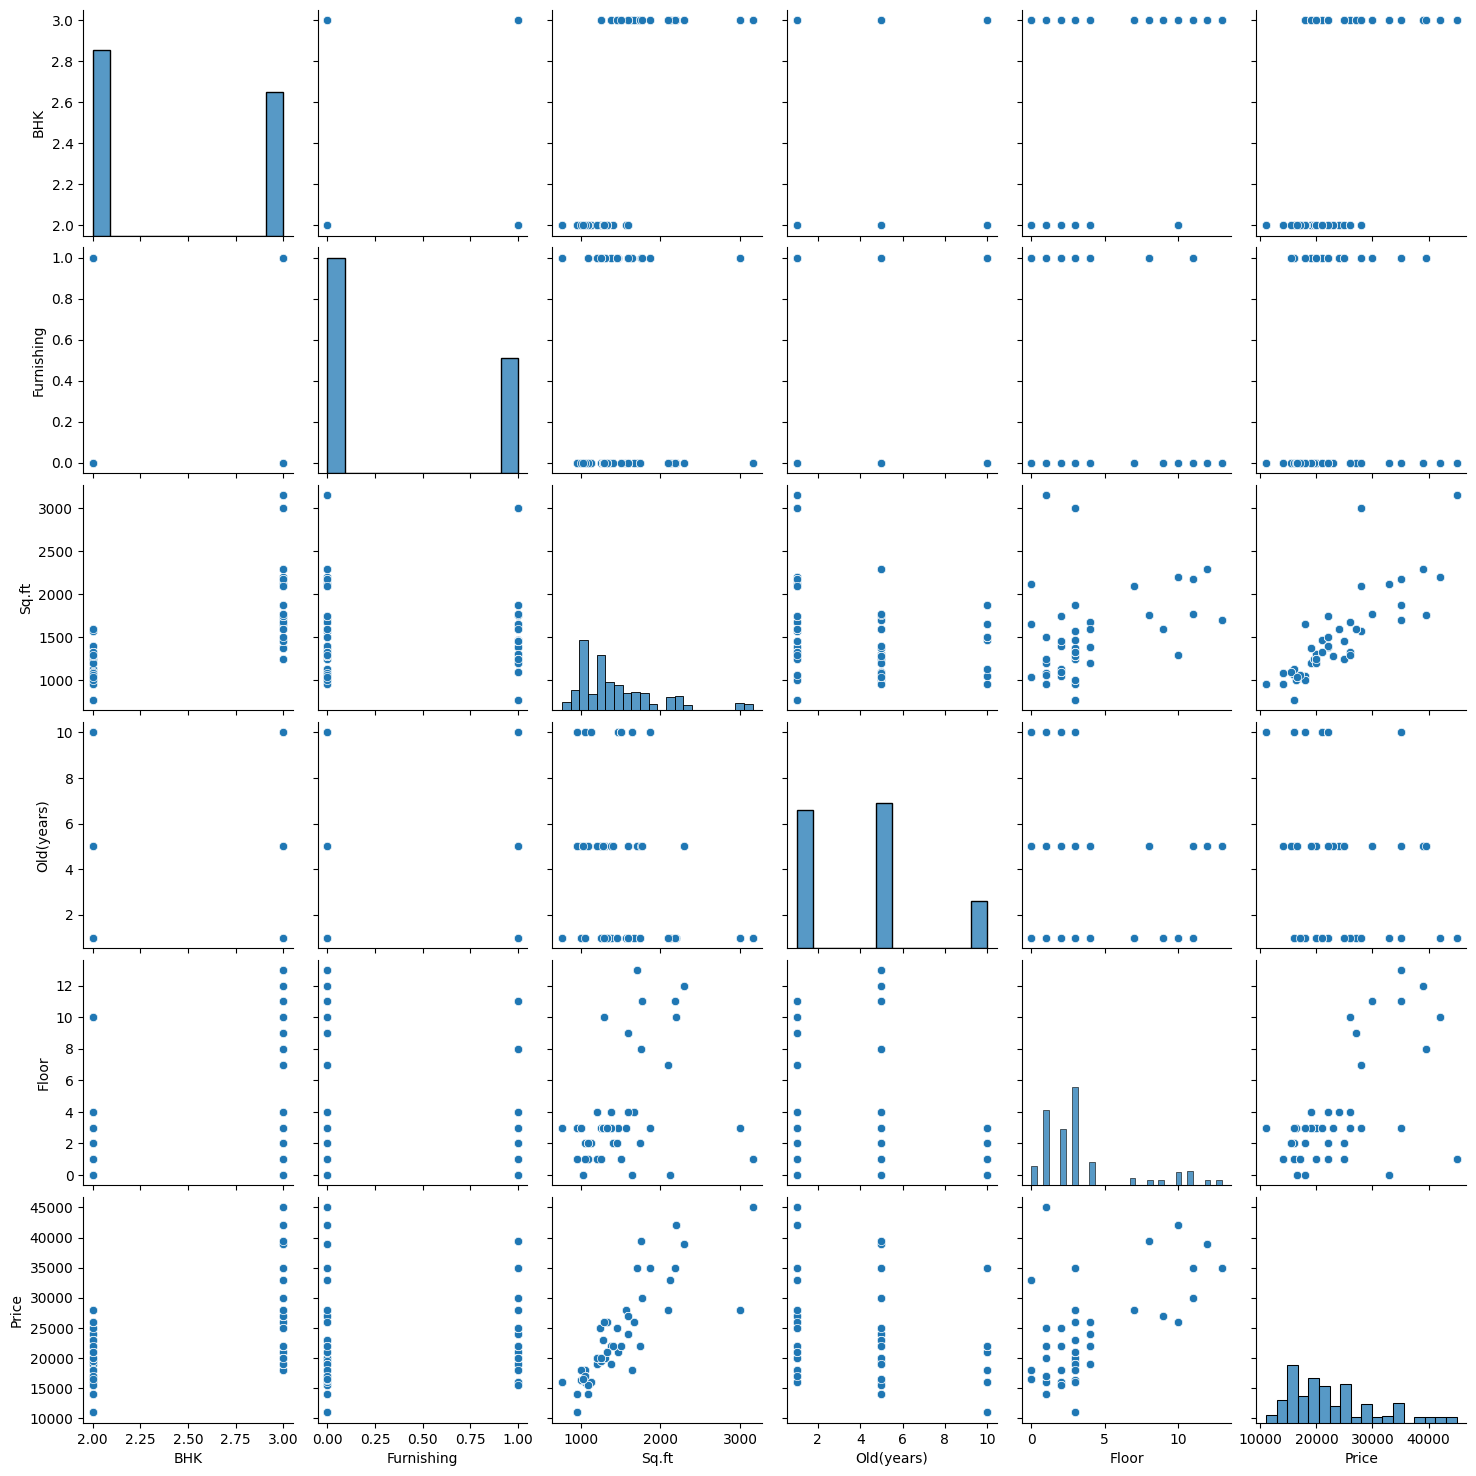

In [10]:
#now doing pair plotting
x=plt.figure(figsize=(3,3))
sns.pairplot(df)
plt.show()

In [11]:
#now perforn=ming the corelation
df.corr()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
BHK,1.000000,0.136625,0.689055,-0.186380,0.337754,0.633094
Furnishing,0.136625,1.000000,0.042385,0.091563,-0.078199,0.018996
Sq.ft,0.689055,0.042385,1.000000,-0.258306,0.376009,0.831104
Old(years),-0.186380,0.091563,-0.258306,1.000000,-0.197940,-0.304325
Floor,0.337754,-0.078199,0.376009,-0.197940,1.000000,0.599192
Price,0.633094,0.018996,0.831104,-0.304325,0.599192,1.000000


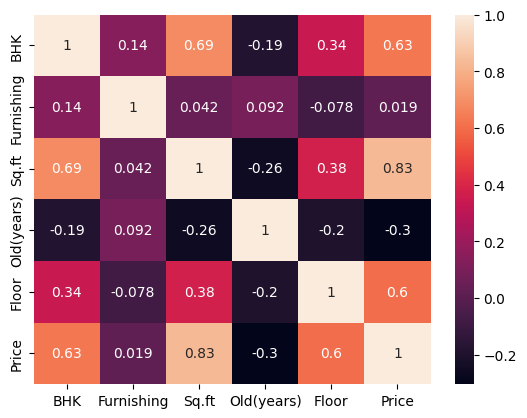

In [12]:
#now plotting  the heatmap of corelation
sns.heatmap(df.corr(), annot= True)
plt.show()

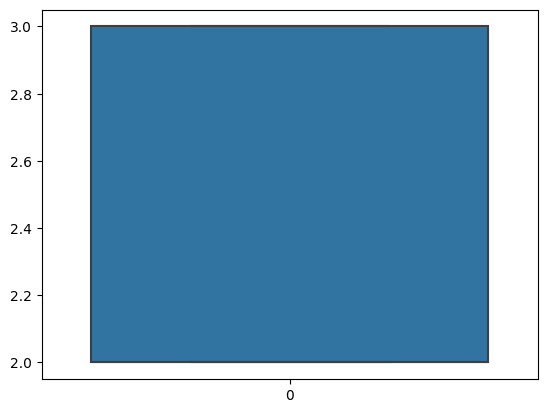

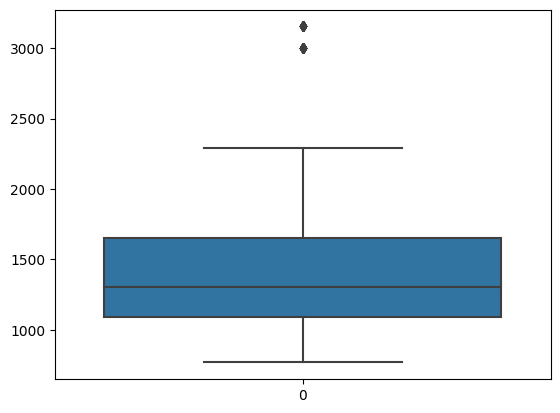

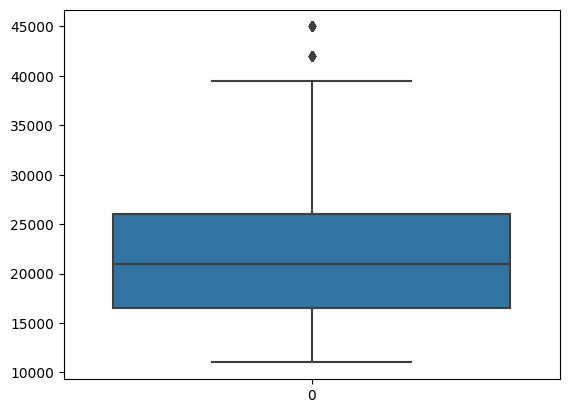

In [13]:
#looking for outlier
sns.boxplot(df['BHK'])
plt.show()
sns.boxplot(df['Sq.ft'])
plt.show()
sns.boxplot(df['Price'])
plt.show()

In [14]:
# extracting x and y from the df
x  = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x.shape

(1000, 5)

In [15]:
# splitting the x and y into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
# creating and traning the KNN model
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
# Predicting and evaluating the model
from sklearn.metrics import accuracy_score,precision_score,f1_score
y_pred = knc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print('f1_score',f1_score(y_test,y_pred,pos_label='positive',average='micro'))

accuracy_score 1.0
precision_score 1.0
f1_score 1.0


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       11000       1.00      1.00      1.00         3
       14000       1.00      1.00      1.00         8
       15500       1.00      1.00      1.00        15
       16000       1.00      1.00      1.00        12
       16400       1.00      1.00      1.00         3
       16500       1.00      1.00      1.00         5
       17000       1.00      1.00      1.00         1
       18000       1.00      1.00      1.00         9
       19000       1.00      1.00      1.00         3
       19500       1.00      1.00      1.00         4
       20000       1.00      1.00      1.00        15
       21000       1.00      1.00      1.00         9
       22000       1.00      1.00      1.00        17
       23000       1.00      1.00      1.00         5
       24000       1.00      1.00      1.00         8
       25000       1.00      1.00      1.00         9
       26000       1.00      1.00      1.00        14
       27000       1.00    

In [19]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thrshold = roc_curve(y_test,y_pred,pos_label=0)


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [20]:
print(thrshold)

[45001 45000 39500 39000 35000 33000 30000 28000 27000 26000 25000 24000
 23000 22000 21000 20000 19500 19000 18000 17000 16500 16400 16000 15500
 14000 11000]


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       11000       1.00      1.00      1.00         3
       14000       1.00      1.00      1.00         8
       15500       1.00      1.00      1.00        15
       16000       1.00      1.00      1.00        12
       16400       1.00      1.00      1.00         3
       16500       1.00      1.00      1.00         5
       17000       1.00      1.00      1.00         1
       18000       1.00      1.00      1.00         9
       19000       1.00      1.00      1.00         3
       19500       1.00      1.00      1.00         4
       20000       1.00      1.00      1.00        15
       21000       1.00      1.00      1.00         9
       22000       1.00      1.00      1.00        17
       23000       1.00      1.00      1.00         5
       24000       1.00      1.00      1.00         8
       25000       1.00      1.00      1.00         9
       26000       1.00      1.00      1.00        14
       27000       1.00    

# cross vaildation

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
svm = SVC(kernel='rbf',random_state=0)
knc = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
lrc = LogisticRegression()
dtc = DecisionTreeClassifier(max_depth=8)

In [23]:
print('logistic regression cross validation score')
print(cross_val_score(lrc,x,y,scoring='accuracy',cv=10).mean())

logistic regression cross validation score


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

0.32


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print('KNN cross validation score')
print(cross_val_score(knc,x,y,scoring='accuracy',cv=10).mean())

KNN cross validation score
1.0


In [25]:
print('SVM cross validation score')
print(cross_val_score(svm,x,y,scoring='accuracy',cv=10).mean())

SVM cross validation score
0.29900000000000004


In [26]:
print('decision tree cross validation score')
print(cross_val_score(dtc,x,y,scoring='accuracy',cv=10).mean())

decision tree cross validation score
0.969
